# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_polyprism.pickle') as f:
        model_polyprism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (35,25)
Number of data: 875.0
dx: 352.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_polyprism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 30.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_polyprism['m_R']
print 'Inclination: %.1f degree' % model_polyprism['inc_R']
print 'Declination: %.1f degree' % model_polyprism['dec_R']

Intensity: 5.0 A/m
Inclination: 55.0 degree
Declination: 40.0 degree


In [16]:
inc_R,dec_R = model_polyprism['inc_R'],model_polyprism['dec_R']

## Generating the layer with my function 

In [17]:
h = 1500.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,1e6,1e7,1e8]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_polyprism_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_polyprism_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
2.82149582753 -0.0584009266859
i = 1
10.0860816404 2.07465765375
i = 2
14.7287436824 3.19688244284
i = 3
18.1743421121 3.9269420156
i = 4
20.877589031 4.54754981254
i = 5
23.1148173428 5.11722149267
i = 6
25.0427316946 5.64081512066
i = 7
26.7260552645 6.12970954566
i = 8
28.2045212079 6.58710783672
i = 9
29.5219629263 7.02185768542
i = 10
30.7091192631 7.45534092712
i = 11
31.7881052603 7.89748822142
i = 12
32.7725412552 8.3445221495
i = 13
33.6800984694 8.79413334041
i = 14
34.519620542 9.24252640874
i = 15
35.2977716906 9.68801063837
i = 16
36.021248593 10.1311336241
i = 17
36.6949051188 10.5745428322
i = 18
37.3256067212 11.0178234778
i = 19
37.9208060661 11.4632955431
i = 20
38.4831761255 11.9117525735
i = 21
39.0155756417 12.3614264542
i = 22
39.520370825 12.8118982986
i = 23
39.99991255 13.2633156111
i = 24
40.4563298323 13.7167256124
i = 25
40.8919355164 14.172704599
i = 26
41.3077793045 14.6316571745
i = 27
41.7048404609 15.0928537172
i = 28
42.0837286286 15.5552069556
i

34.5196845028 9.24261668566
i = 15
35.2978349619 9.6881221438
i = 16
36.0213086398 10.131270333
i = 17
36.6949656569 10.5747005091
i = 18
37.3256657798 11.0180036348
i = 19
37.9208714103 11.463497783
i = 20
38.4832403569 11.9119745329
i = 21
39.0156327006 12.3616641884
i = 22
39.520415462 12.8121478798
i = 23
39.9999402187 13.2635724257
i = 24
40.4563573495 13.7169966452
i = 25
40.8919622568 14.1729900914
i = 26
41.3078045455 14.6319562115
i = 27
41.7048633072 15.0931649433
i = 28
42.0837485454 15.5555286991
i = 29
42.4456534584 16.0185609808
i = 30
42.7914403344 16.4818830366
i = 31
43.121708687 16.9444259809
i = 32
43.4371380086 17.4053441237
i = 33
43.7386823171 17.8642798177
i = 34
44.0275317946 18.3210445376
i = 35
44.3040148824 18.7748995175
i = 36
44.5675303341 19.2241582505
i = 37
44.8199481342 19.6697588762
i = 38
45.0632688526 20.1132922821
i = 39
45.2979883412 20.5542351321
i = 40
45.5244438286 20.9920873875
i = 41
45.7429700144 21.42637529
i = 42
45.9539058692 21.8563441171

42.6028537828 17.3747907251
i = 30
42.9392932069 17.8791410837
i = 31
43.2629216102 18.3831928709
i = 32
43.5742027198 18.8857979685
i = 33
43.8737888368 19.3863878297
i = 34
44.1622695198 19.8851157201
i = 35
44.4399436385 20.3821658749
i = 36
44.7072988304 20.876689062
i = 37
44.9648304386 21.3680219418
i = 38
45.2129013693 21.8556605259
i = 39
45.4518963034 22.3390360585
i = 40
45.6822802452 22.8176159777
i = 41
45.9044188905 23.2906865363
i = 42
46.1186764813 23.7577018895
i = 43
46.3254120416 24.2184900333
i = 44
46.5249600545 24.672495789
i = 45
46.7178127679 25.119204824
i = 46
46.9043617168 25.5581942061
i = 47
47.0847910025 25.9890693295
i = 48
47.2593252653 26.411381668
i = 49
47.4281961951 26.8239862054
i = 50
47.5916973522 27.2265769621
i = 51
47.750092008 27.619015084
i = 52
47.903650143 28.0012998317
i = 53
48.0526452951 28.3738266581
i = 54
48.1973051872 28.7363812284
i = 55
48.3378541293 29.0886371357
i = 56
48.4745047249 29.4309080238
i = 57
48.6074489454 29.7633304734

## L-curve visualization

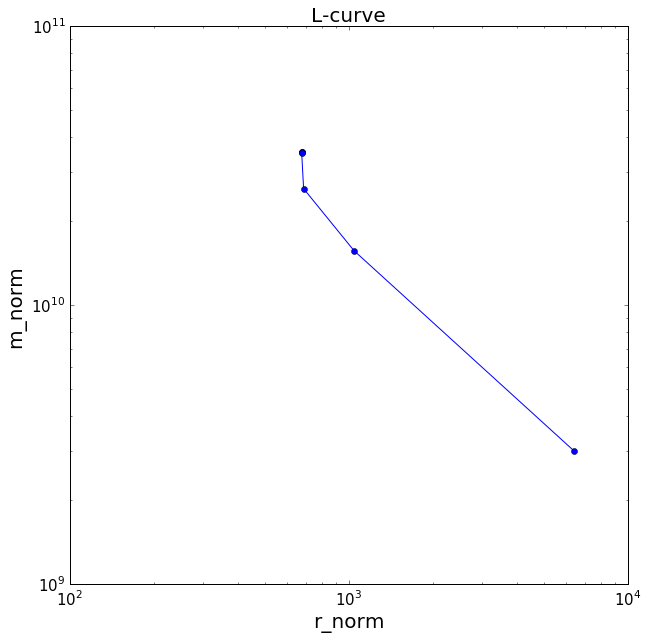

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
